In [27]:
#Complete Markets:
import numpy as np
import pylab
from pylab import mpl, plt
from numpy.random import default_rng
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

#In this notebook, I shall be working with random numbers generated from 0 to 1:
rng = default_rng()



[[19.74914056  5.16723963]
 [18.92211478  5.71859015]
 [19.40957216  5.39361856]
 [16.5585849   7.29427673]
 [19.50524241  5.3298384 ]]


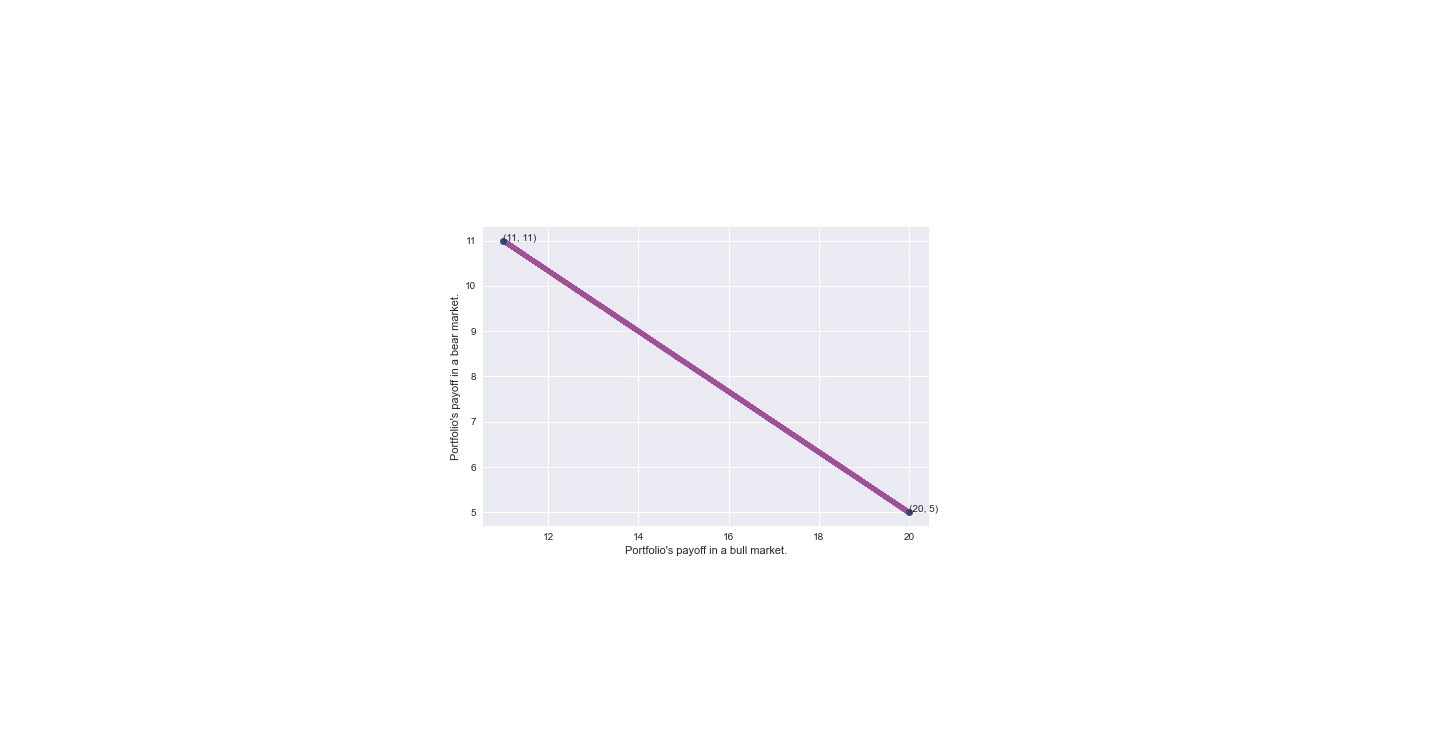

In [28]:
#A Simple Complete Market in which there are two assets whose positions add up to 1 within traders' portfolios
#A 'complete market' is a market in which there is an equilibrium price for every possible transaction, or contingent claim, within it.
# It follows that there is a specific equilibrium price associated with an asset for every possible state of the market.
#In this cell's toy market, every possible transaction can be replicated by a portfolio constituted by a risk-less bond and a risky stock.

#The state-contingent prices for my assets:
B= (10, np.array((11, 11))) #The riskless bond, whose payoff does not depend on the future state of the market
S = (10, np.array((20, 5))) #The risky stock, whose payoff depends on the future state of the market

#Simulating the positions of bonds and stocks in traders' portfolios:
n = 10000 #The number of portfolios to be simulated

b = rng.random(n) #Simulating the traders' bond positions
s = 1-b #Simulating the traders' stock positions; I assume b+s=1


#I now plot the various portfolios
A = [b[i]*B[1] + s[i]*S[1] for i in range(n)] #Constructing the set of all possible contingent claims
A = np.array(A)
print(A[:5])

plt.xlabel('Portfolio\'s payoff in a bull market.')
plt.ylabel('Portfolio\'s payoff in a bear market.')

plt.annotate("(0, 0)", (0, 0))
plt.annotate("(31, 16)", (31, 16))
plt.annotate("(20, 5)", (20, 5))
plt.annotate("(11, 11)", (11, 11))

#I graph points that correspond to two possible pure portfollios, that is b = 1 and s=1
plt.plot(20, 5, 'o', color='#2f4b7c')  
plt.plot(11, 11, 'o', color='#2f4b7c') 

plt.scatter(A[:,0], A[:, 1], marker = '.', s=5, lw = 3.0, color='#a05195')

#The complete market is demonstrated by all portfolios fall on a line segment that spans the two pure portfolios


[[12.67146417  7.4490801 ]
 [18.75532698  7.69150624]
 [16.82119618  6.23832066]
 [17.33943817  7.45913786]
 [20.17445174 10.08343474]]


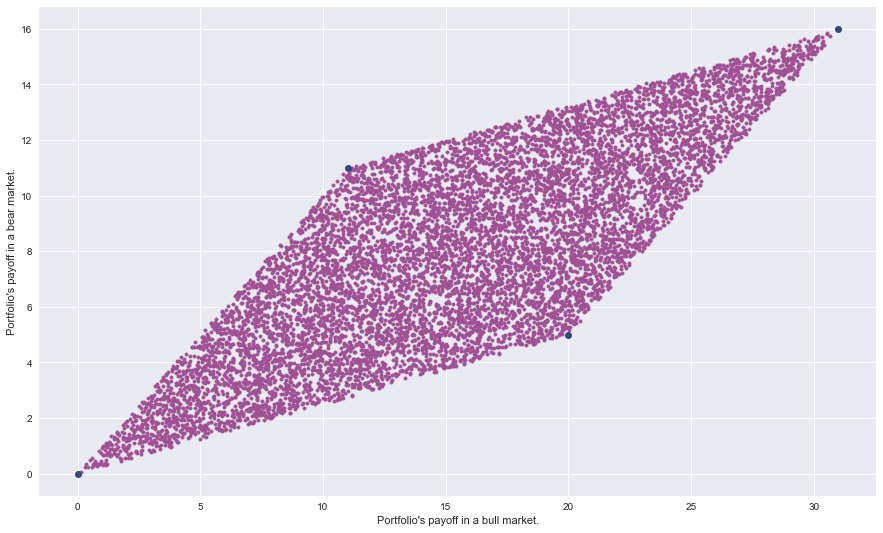

In [29]:
#I now loosen my assumption that traders' positions need to add up to one:
b = rng.random(n)
s = rng.random(n)


A = [b[i]*B[1] + s[i]*S[1] for i in range(n)] #Constructing the set of all possible contingent claims
A = np.array(A)
print(A[:5])

plt.style.use('seaborn')

fig = plt.figure(figsize=(15, 9))
plt.scatter(A[:, 0], A[:, 1], color='#a05195', marker='.'); 

plt.xlabel('Portfolio\'s payoff in a bull market.')
plt.ylabel('Portfolio\'s payoff in a bear market.')

#Once again, to graphically demonstrate that the market is complete, I graph out the extreme possible positions, given how I generate my random numbers:
plt.plot(0, 0, 'o', color='#2f4b7c') #A portfolio that holds no assets
plt.plot(B[1][0]+S[1][0], B[1][1]+S[1][1], 'o', color='#2f4b7c') #A portfolio in which b = 1 and b = 1 
plt.plot(S[1][0], S[1][1], 'o', color='#2f4b7c')  #A pure stock portfolio
plt.plot(B[1][0], B[1][1], 'o', color='#2f4b7c') #A pure bond portfolio

#The completeness of this cell's toy market is demonstrated by the fact that all possible portfolios fall within a diamond that is marked out by the four extrema.

(10, array([11, 11, 11]))
(10, array([20, 10,  5]))
[ 0.81591603 -0.92304212 -1.85043093  1.24009602  0.84188267]
[ 0.81591603 -0.92304212 -1.85043093  1.24009602  0.84188267]
[[  4.87989161   6.92748396   7.95128013]
 [  1.87850869  -4.1374773   -7.14547029]
 [-12.11234009 -16.23354019 -18.29414023]
 [ 21.31037015  17.47571319  15.55838471]
 [-31.34323972 -11.04126519  -0.89027793]]


Text(0.5, 0, 'Payoff in a Bear Market')

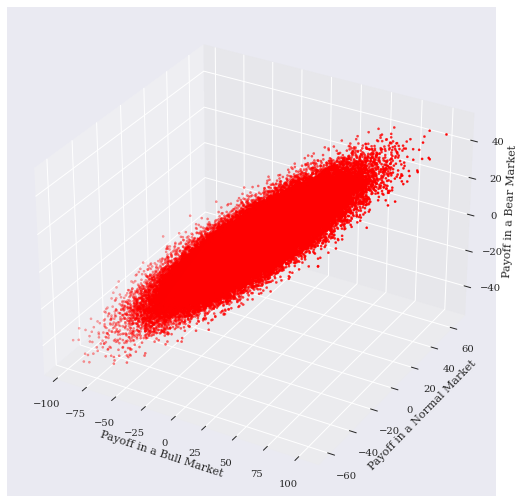

In [32]:
rng = default_rng()

#Contingent-Claim Pricing in a Complete Three-State Market
B= (10, np.array((11, 11, 11)))
S = (10, np.array((20, 10, 5)))
print(B)
print(S)

n = 100000

b = np.random.normal(size=n)
s = np.random.normal(size=n)

print(b[:5])
print(b[:5])


A = [b[i]*B[1] + s[i]*S[1] for i in range(n)] #Constructing the set of all possible contingent claims
A = np.array(A)
print(A[:5])

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c='r', marker='.'); #Note that the attainable claims only span a two-dimensional area, R^2
ax.set_xlabel(r'Payoff in a Bull Market')
ax.set_ylabel(r'Payoff in a Normal Market')

ax.set_zlabel(r'Payoff in a Bear Market', rotation=60)

(10, array([11, 11, 11]))
(10, array([20, 10,  5]))
(10, array([10, 25, 10]))
[-0.93735715  0.93623398 -0.11052764  0.59899318  0.77672541]
[[-27.7798395  -21.38550472 -15.55570158]
 [  5.04889178   7.33588728   8.85946121]
 [ -5.20987611   7.19655651   1.68920164]
 [ 23.7314898   15.5562937   11.02309853]
 [ 21.09691312  13.24964621  11.09316289]]


Text(0.5, 0, 'Payoff in a Bear Market')

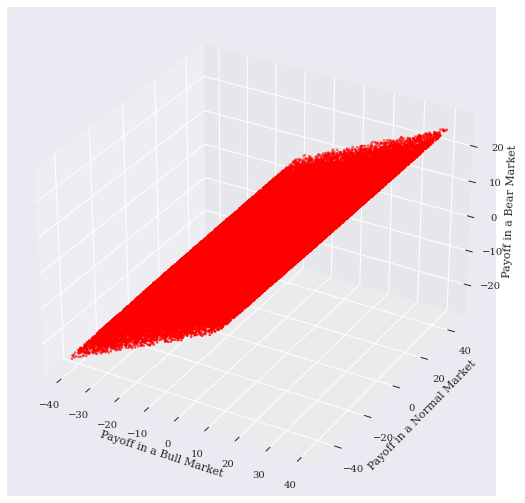

In [ ]:
B= (10, np.array((11, 11, 11)))
S_1 = (10, np.array((20, 10, 5)))
S_2 = (10, np.array((10, 25, 10)))
print(B)
print(S_1)
print(S_2)
n = 100000

b = np.random.uniform(low=-1, high=1, size=n)
s_1 = np.random.uniform(low=-1, high=1, size=n)
s_2 = np.random.uniform(low=-1, high=1, size=n)
print(b[:5])



A = [b[i]*B[1] + s_1[i]*S_1[1] + s_2[i]*V[1]  for i in range(n)] #Constructing the set of all possible contingent claims
A = np.array(A)
print(A[:5])

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c='r', marker='.'); #Note that the attainable claims only span a two-dimensional area, R^2
ax.set_xlabel(r'Payoff in a Bull Market')
ax.set_ylabel(r'Payoff in a Normal Market')
ax.set_zlabel(r'Payoff in a Bear Market', rotation=60)



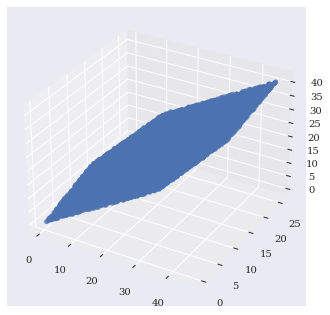

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

zdata = A[:, 0]
xdata = A[:, 1]
ydata = A[:, 2]
ax.scatter3D(xdata, ydata, zdata);

In [ ]:
M = np.array((B[1], S_1[1], S_2[1]))
print(M)

np.linalg.linalg.matrix_rank(M)

C_1 = np.array((30, 10, 0))
print(C_1)

np.linalg.solve(M, C_1)

[[11 11 11]
 [20 10  5]
 [10 25 10]]
[30 10  0]


array([ 0.36363636, -1.81818182,  4.18181818])

In [ ]:
z1 = rng.random(5)
print(z1)

z2 = np.array(np.random.randn(1,5))
print(z2)

z3 = r = np.random.normal(1, 0.1, size=5)
print(z3)

z_4 = np.random.uniform(low=-1, high=1, size=5)
print(z_4)

[0.84796607 0.67999471 0.2098957  0.41013307 0.3219275 ]
[[-0.34951655 -0.45371908  1.04248818 -0.57383276 -0.45538268]]
[0.99913969 1.03923204 1.10448123 1.01068007 1.12448954]
[-0.66598921  0.42375914  0.79599469  0.68262731 -0.03011807]
